### 叢集


In [1]:
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl

%matplotlib inline

In [2]:
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc , roc_auc_score

In [3]:
current_path = os.getcwd()
file = '\\datasets\\mnist_data\\mnist.pkl.gz'

f = gzip.open(current_path+file,'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0] , train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test , y_test = test_set[0], test_set[1]

train_index = range(0, len(X_train))
validation_index = range(len(X_train),len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), len(X_train)+len(X_validation)+len(X_test))
test_index

range(60000, 70000)

In [4]:
X_train = pd.DataFrame(data = X_train, index = train_index)
y_train = pd.DataFrame(data = y_train, index = train_index)

X_validation = pd.DataFrame(data = X_validation, index = validation_index)
y_validation = pd.DataFrame(data = y_validation, index = validation_index)

X_test = pd.DataFrame(data = X_test, index = test_index)
y_test = pd.DataFrame(data = X_test, index = test_index)

X_train.shape

(50000, 784)

### 叢集演算法
在實施叢集之前，我們會利用PCA來降維。

In [5]:
from sklearn.decomposition import PCA
n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components =n_components,whiten=whiten,random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data = X_train_PCA, index = train_index)
X_train_PCA

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.461486,-1.246855,0.046273,-2.151945,-0.247279,-0.925423,0.889330,0.507176,-1.541691,0.689369,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.769952e-05,0.000000e+00,-0.000000e+00,-0.000000e+00
1,3.921789,-1.251975,2.335259,-1.340886,-3.421518,-0.725724,-0.206345,-0.345285,0.134086,0.595475,...,4.742170e-09,3.580562e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.123725e-07,9.395818e-07,3.014860e-07,-9.617160e-09
2,-0.203721,1.547937,-0.980331,2.039093,-1.079877,0.112884,-3.312348,1.403171,-0.592898,-0.763839,...,-4.074979e-09,1.525597e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.025918e-07,-1.396577e-06,-2.071702e-06,9.332764e-08
3,-3.148450,-2.296099,1.091154,0.484597,0.066825,2.778972,-1.834356,-0.174753,1.166451,0.052855,...,-2.637537e-09,-1.327225e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.694219e-07,2.036669e-06,6.437483e-07,-1.065743e-06
4,-1.442739,2.871986,0.175652,-0.976909,0.302757,0.120654,-0.376723,-1.478132,1.003752,0.540808,...,2.856352e-08,1.209660e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.287487e-07,5.551837e-06,-2.360454e-06,1.661697e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.147555,-1.972690,-3.739122,1.209665,-0.312002,-0.893656,1.491477,0.013916,-0.385557,-2.202909,...,-1.235761e-09,-7.058333e-09,7.806817e-09,-8.796969e-09,3.067120e-10,-9.134856e-10,1.711371e-08,5.020282e-09,3.332030e-10,7.047642e-10
49996,1.416381,-0.252682,-0.809476,-0.523546,-3.905657,0.187955,-0.449568,-1.231870,-0.104625,0.510858,...,3.175924e-08,6.614789e-08,-4.256530e-09,-6.259228e-09,-3.637915e-09,-1.452559e-09,-1.338935e-08,4.821441e-09,-9.016426e-09,2.229096e-09
49997,-1.425329,-1.957541,-2.551116,0.094593,0.654068,-0.603917,0.312860,-0.047757,0.994548,0.222441,...,1.209317e-08,3.002637e-09,4.055785e-09,5.872140e-09,-4.875055e-09,-2.666693e-09,6.463983e-09,2.125245e-09,-3.535153e-10,-2.285242e-09
49998,-1.507546,1.025468,0.107841,0.276075,2.285549,-0.590754,-0.676684,-0.062367,0.050038,1.578244,...,-6.101628e-09,-2.223911e-09,3.903040e-09,-4.990766e-09,-1.209658e-09,-2.191153e-10,3.466794e-09,2.763308e-09,-2.949933e-09,6.518028e-10


In [42]:
cwd = os.getcwd()
log_dir = cwd+ '/logs/05_clustering/'
y_train[0:2000].to_csv(log_dir+'label.tsv', sep='\t',index=False,header=False)

### k-means
指派不同的叢集數會有差異存在，kmeans採用隨機指點，隨機指派之後會重新指派不同的存即使的歐是距離最短。

In [33]:
from sklearn.cluster import KMeans

n_clusters =10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018


kMeans_inertia = pd.DataFrame(data = [], index = range(2,21),
                             columns=['inertia'])


In [44]:
for n_cluster in range(2,21):
    kmeans = KMeans(n_clusters=n_cluster,
                   n_init = n_init,
                   max_iter = max_iter,
                   tol=tol,
                   random_state=random_state)
    cutoff =99
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_


In [46]:
kMeans_inertia

,inertia
2,2229538.75
3,2109837.5
4,2020523.125
5,1938015.125
6,1876244.625
7,1832716.25
8,1794334.75
9,1757596.125
10,1727590.375
11,1698053.75


<AxesSubplot:>

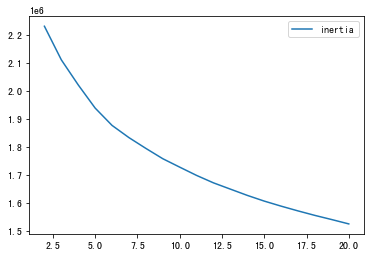

In [45]:
kMeans_inertia.plot()

### 評估叢集結果


In [ ]:
def analyzeCluster(clusterDF, labelsDF):
    countByCluster = pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns = ['cluster','clusterCount']
    
    preds = pd.concat([labelsDF,clusterDF],axis=1)
    preds.columns = ['truelabel','cluster']
    
    countByLabel = pd.DataFrame(data= preds.groupby('trueLabel').count())
    countMostFreq = pd.DataFrame(data=preds.groupby('cluster').agg(lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns = ['cluster','clusterCount']
    

In [106]:
def analyzeCluster(clusterDF, labelsDF):
    countByCluster = pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns=['cluster','clusterCount']
    
    preds = pd.concat([labelsDF,clusterDF],axis=1)
    preds.columns = ['trueLabel','cluster']
    
    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())
    print(countByLabel)
    
    countMostFreq = pd.DataFrame(data=preds.groupby('cluster').agg(lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns=['cluster','countMostFrequent']
    
    accuracyDF = countMostFreq.merge(countByCluster, left_on='cluster', right_on='cluster')
    
    overallAccuracy = accuracyDF.countMostFrequent.sum()/accuracyDF.clusterCount.sum()
    
    accuracyBylabel = accuracyDF.countMostFrequent/accuracyDF.clusterCount
    
    return countByCluster,countByLabel,countMostFreq,accuracyDF,overallAccuracy,accuracyBylabel

In [55]:
X_train_kmeansClustered =kmeans.predict(X_train_PCA.loc[:,0:99])
X_train_kmeansClustered = pd.DataFrame(data=X_train_kmeansClustered, index=train_index, columns=['cluster'])
print('X_train_kmeansClustered\n',X_train_kmeansClustered)
analyzeCluster(X_train_kmeansClustered,y_train)

X_train_kmeansClustered
        cluster
0            7
1            6
2            3
3            9
4           15
...        ...
49995        8
49996       13
49997        5
49998       16
49999        5

[50000 rows x 1 columns]
           cluster
trueLabel         
0             4932
1             5678
2             4968
3             5101
4             4859
5             4506
6             4951
7             5175
8             4842
9             4988


In [107]:
# clusterDF = X_train_kmeansClustered
# labelsDF = y_train

# countByCluster = pd.DataFrame(data = clusterDF['cluster'], index=train_index)
# countByCluster.reset_index(inplace=True, drop=False)
# countByCluster.columns=['cluster','clusterCount']
# countByCluster

# preds = pd.concat([labelsDF,clusterDF],axis=1)
# preds.columns=['truelabels','cluster']
# preds

# countByLabel = pd.DataFrame(data=preds.groupby('truelabels').count())
# countByLabel

# countMostFreq = pd.DataFrame(data = preds.groupby('cluster').agg(lambda x:x.value_counts().iloc[0]))
# countMostFreq.reset_index(inplace=True, drop=False)
# countMostFreq.columns=['cluster', 'countMostFrequent']

# accuracyDF = countMostFreq.merge(countByCluster , left_on='cluster', right_on='cluster')

# overallAccuracy = accuracyDF.countMostFrequent.sum()/accuracyDF.clusterCount.sum()
# overallAccuracy

# accuracyByLabel = accuracyDF.countMostFrequent/ accuracyDF.clusterCount
# accuracyByLabel

In [108]:
n_clusters =5 
n_init = 10
max_iter = 100
tol = 0.0001
random_state= 2018

kMeans_inertia = pd.DataFrame(data=[],index=range(2,21),columns=['inertia'])
overallAccuracy_KMeansDF = pd.DataFrame(data=[], index=range(2,21), columns=['overallAccuracy'])

for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters = n_clusters,
                   n_init=n_init,
                   max_iter=max_iter,
                   tol=tol,
                   random_state=random_state)
    cutoff = 99
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    X_train_KmeansClustered = kmeans.predict(X_train_PCA.loc[:,0:cutoff])
    X_train_KmeansClustered = pd.DataFrame(data=X_train_KmeansClustered, index=train_index,columns=['cluster'])
    
    countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans,accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans = analyzeCluster(X_train_KmeansClustered, y_train)
    overallAccuracy_KMeansDF.loc[n_clusters] = overallAccuracy_kMeans
                                        

           cluster
trueLabel         
0             4932
1             5678
2             4968
3             5101
4             4859
5             4506
6             4951
7             5175
8             4842
9             4988
           cluster
trueLabel         
0             4932
1             5678
2             4968
3             5101
4             4859
5             4506
6             4951
7             5175
8             4842
9             4988
           cluster
trueLabel         
0             4932
1             5678
2             4968
3             5101
4             4859
5             4506
6             4951
7             5175
8             4842
9             4988
           cluster
trueLabel         
0             4932
1             5678
2             4968
3             5101
4             4859
5             4506
6             4951
7             5175
8             4842
9             4988
           cluster
trueLabel         
0             4932
1             5678
2           

<AxesSubplot:>

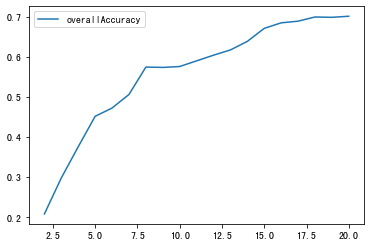

In [109]:
overallAccuracy_KMeansDF.plot()

In [110]:
overallAccuracy_KMeansDF

,overallAccuracy
2,0.20832
3,0.2981
4,0.37578
5,0.45156
6,0.47216
7,0.5059
8,0.57418
9,0.57338
10,0.57558
11,0.5897
